<a href="https://colab.research.google.com/github/projectsofiqbal/oscar-prediction-2025-tableau/blob/main/Smart_Traffic_Congestion_Analysis_%26_Prediction_System_for_Bangalore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def generate_bangalore_traffic_data():
    """Generate realistic Bangalore traffic data for analysis"""
    np.random.seed(42)

    # Create date range for 2 years
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2024, 12, 31)
    dates = pd.date_range(start_date, end_date, freq='H')  # Hourly data

    # Bangalore major areas and routes
    areas = ['Whitefield', 'Electronic City', 'Koramangala', 'Indiranagar', 'Jayanagar',
             'Marathahalli', 'BTM Layout', 'HSR Layout', 'Banashankari', 'Rajajinagar',
             'Hebbal', 'Silk Board', 'KR Puram', 'Yeshwantpur', 'Majestic']

    vehicle_types = ['Cars', 'Bikes', 'Buses', 'Auto_Rickshaws', 'Trucks', 'Cycles']

    traffic_data = []

    for date in dates:
        hour = date.hour
        day_of_week = date.weekday()  # 0=Monday, 6=Sunday
        is_weekend = day_of_week >= 5

        # Traffic patterns based on time and day
        base_multiplier = 1.0

        # Peak hours (8-10 AM, 6-8 PM on weekdays)
        if not is_weekend and ((8 <= hour <= 10) or (18 <= hour <= 20)):
            base_multiplier = 2.5
        elif not is_weekend and ((7 <= hour <= 11) or (17 <= hour <= 21)):
            base_multiplier = 1.8
        elif not is_weekend and (12 <= hour <= 16):
            base_multiplier = 1.3
        elif is_weekend and (10 <= hour <= 22):
            base_multiplier = 1.2
        else:
            base_multiplier = 0.6

        for area in areas:
            # Area-specific factors
            area_factor = 1.0
            if area in ['Electronic City', 'Whitefield', 'Marathahalli']:
                area_factor = 1.4  # IT hubs have more traffic
            elif area in ['Majestic', 'KR Puram']:
                area_factor = 1.3  # Transport hubs

            for vehicle_type in vehicle_types:
                # Vehicle type distribution
                if vehicle_type == 'Bikes':
                    base_count = np.random.poisson(800 * base_multiplier * area_factor)
                elif vehicle_type == 'Cars':
                    base_count = np.random.poisson(600 * base_multiplier * area_factor)
                elif vehicle_type == 'Buses':
                    base_count = np.random.poisson(50 * base_multiplier * area_factor)
                elif vehicle_type == 'Auto_Rickshaws':
                    base_count = np.random.poisson(200 * base_multiplier * area_factor)
                elif vehicle_type == 'Trucks':
                    # Trucks mostly during non-peak hours
                    truck_multiplier = 0.3 if base_multiplier > 1.5 else 1.0
                    base_count = np.random.poisson(80 * truck_multiplier * area_factor)
                else:  # Cycles
                    base_count = np.random.poisson(100 * base_multiplier * area_factor)

                # Calculate derived metrics
                avg_speed = max(5, np.random.normal(25, 10) / base_multiplier)  # Speed reduces with traffic
                pollution_index = base_count * 0.1 + np.random.normal(0, 5)
                noise_level = min(100, base_count * 0.05 + np.random.normal(40, 10))

                traffic_data.append({
                    'datetime': date,
                    'area': area,
                    'vehicle_type': vehicle_type,
                    'vehicle_count': max(0, base_count),
                    'avg_speed_kmh': max(5, avg_speed),
                    'pollution_index': max(0, pollution_index),
                    'noise_level_db': max(30, noise_level),
                    'is_weekend': is_weekend,
                    'hour': hour,
                    'day_of_week': day_of_week
                })

Starting Bangalore Traffic Reduction Analysis...
Generating realistic traffic data for major Bangalore areas...
Generated 1,576,890 traffic records
=== BANGALORE TRAFFIC ANALYSIS ===
Dataset shape: (1576890, 12)
Date range: 2023-01-01 00:00:00 to 2024-12-31 00:00:00

Top 3 Peak Traffic Hours:
  19:00 - 49,238,819.4 vehicles
  20:00 - 49,236,291.0 vehicles
  10:00 - 49,234,432.8 vehicles

Top 5 Most Congested Areas:
  Electronic City: 60,215,670.4 vehicles
  Marathahalli: 60,210,512.4 vehicles
  Whitefield: 60,206,499.8 vehicles
  KR Puram: 55,926,243.2 vehicles
  Majestic: 55,911,313.6 vehicles

Vehicle Type Distribution:
  Bikes: 321,238,748.6 (44.5%)
  Cars: 240,899,780.2 (33.3%)
  Auto_Rickshaws: 80,294,437.4 (11.1%)
  Cycles: 40,148,880.2 (5.6%)
  Buses: 20,075,678.2 (2.8%)
  Trucks: 19,898,305.8 (2.8%)

Slowest Moving Areas (Avg Speed):
  Majestic: 24.4 km/h
  Jayanagar: 24.5 km/h
  Whitefield: 24.5 km/h
  Hebbal: 24.5 km/h
  BTM Layout: 24.5 km/h

Highest Pollution Areas:
  White

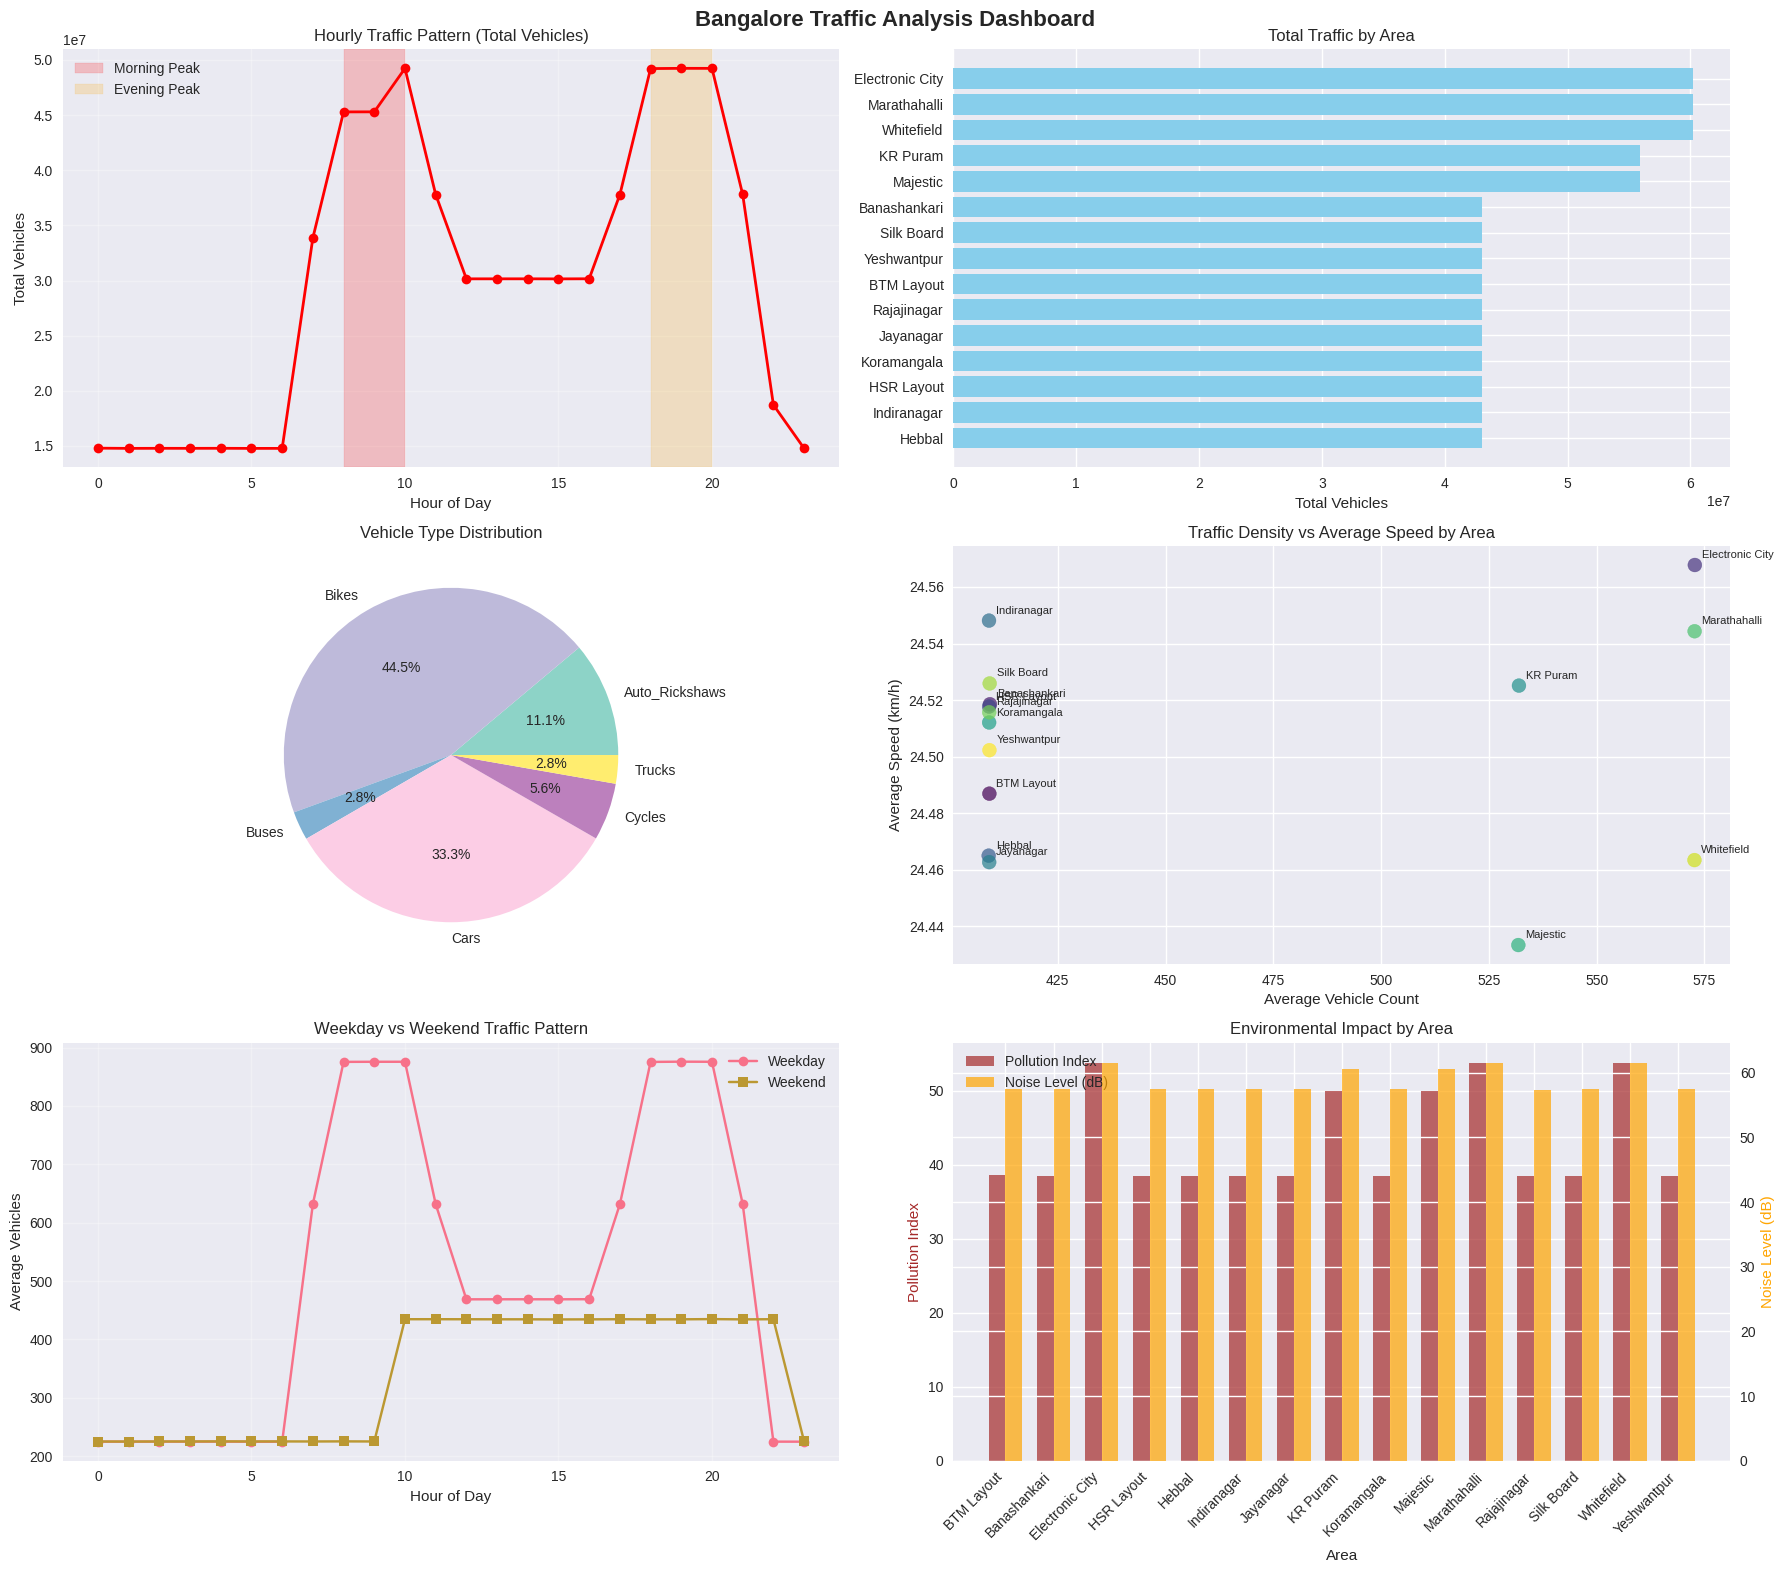

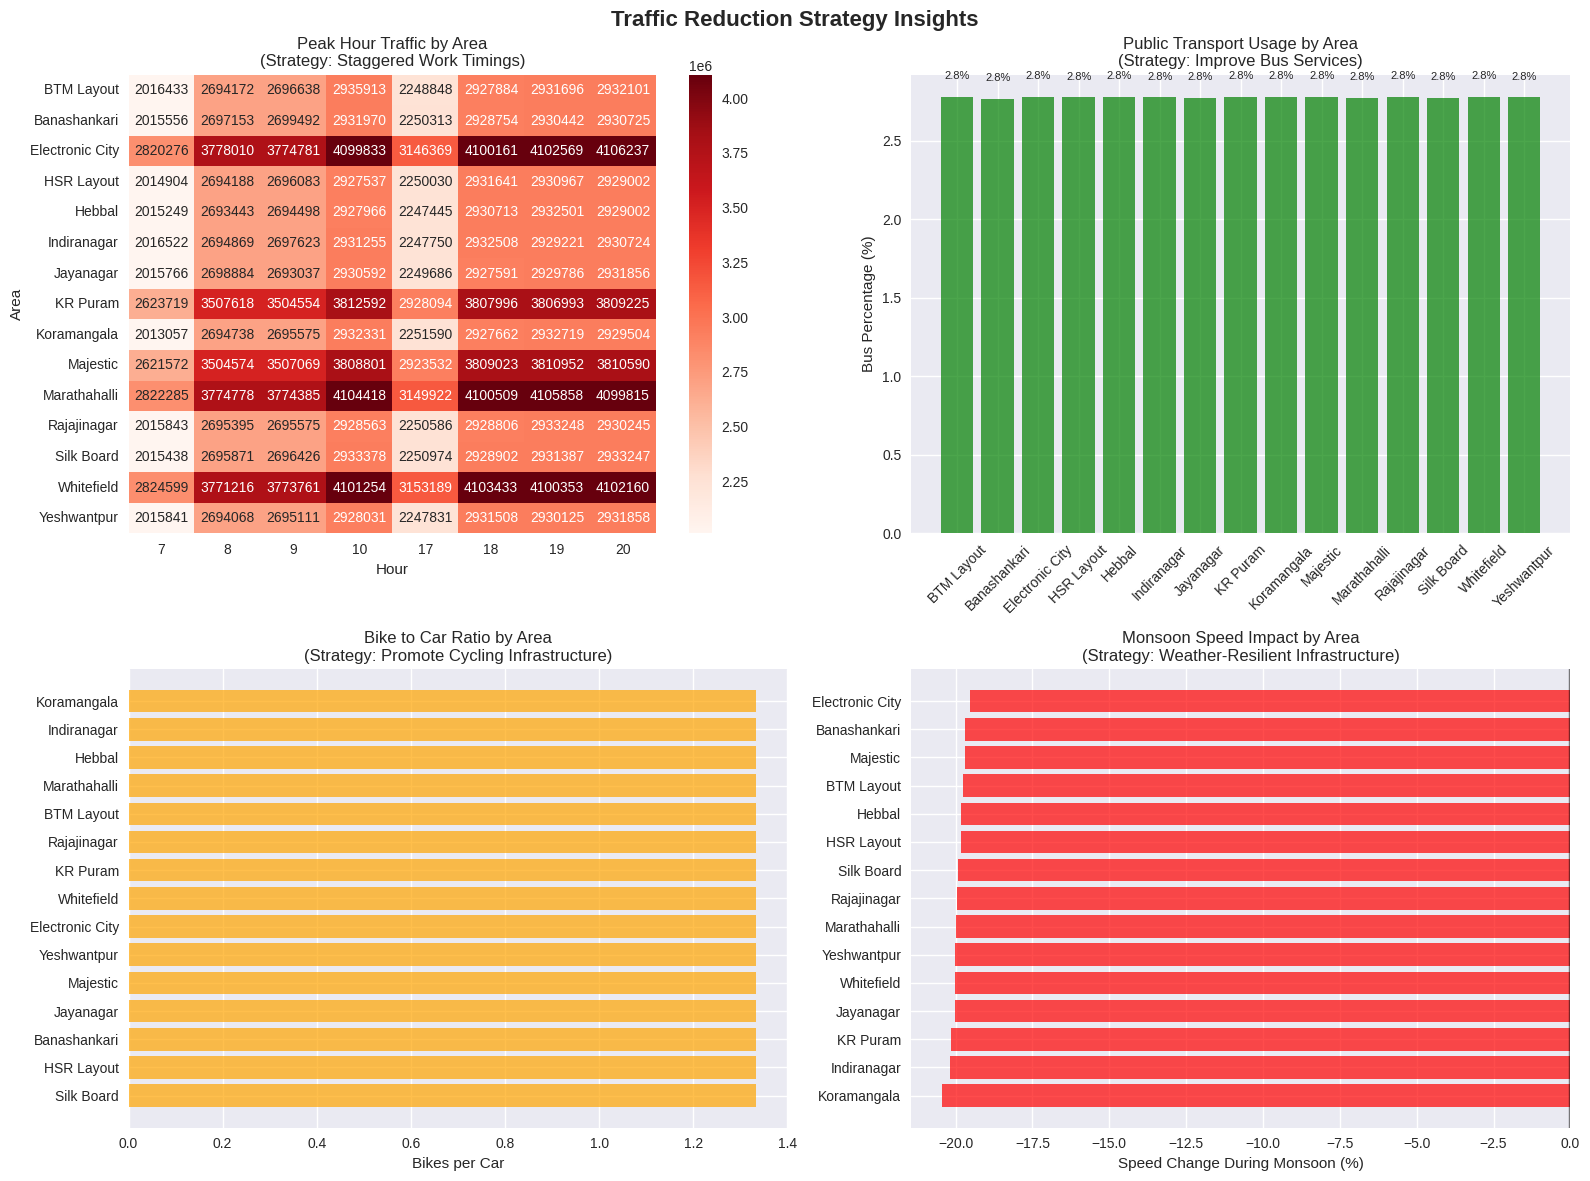


=== TRAFFIC REDUCTION RECOMMENDATIONS ===
1. STAGGERED WORK TIMINGS:
   - 26.2% of traffic occurs during peak hours (8-9 AM, 6-7 PM)
   - Potential reduction: 15-25% if 30% of offices adopt flexible timings

2. PUBLIC TRANSPORT PRIORITY AREAS:
   - Banashankari: Only 2.8% buses - needs better connectivity
   - Silk Board: Only 2.8% buses - needs better connectivity
   - Marathahalli: Only 2.8% buses - needs better connectivity

3. CYCLING INFRASTRUCTURE PRIORITY:
   - Marathahalli: 26,769,734.8 bikes - high potential for dedicated lanes
   - Electronic City: 26,768,393.2 bikes - high potential for dedicated lanes
   - Whitefield: 26,763,769.6 bikes - high potential for dedicated lanes

4. CONGESTION PRICING CANDIDATES:
   - Majestic: Avg speed 24.4 km/h - consider congestion pricing
   - Jayanagar: Avg speed 24.5 km/h - consider congestion pricing
   - Whitefield: Avg speed 24.5 km/h - consider congestion pricing

5. ENVIRONMENTAL PRIORITY ZONES:
   - Whitefield: Pollution index 53.8 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def generate_bangalore_traffic_data():
    """Generate realistic Bangalore traffic data for analysis"""
    np.random.seed(42)

    # Create date range for 2 years
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2024, 12, 31)
    dates = pd.date_range(start_date, end_date, freq='H')  # Hourly data

    # Bangalore major areas and routes
    areas = ['Whitefield', 'Electronic City', 'Koramangala', 'Indiranagar', 'Jayanagar',
             'Marathahalli', 'BTM Layout', 'HSR Layout', 'Banashankari', 'Rajajinagar',
             'Hebbal', 'Silk Board', 'KR Puram', 'Yeshwantpur', 'Majestic']

    vehicle_types = ['Cars', 'Bikes', 'Buses', 'Auto_Rickshaws', 'Trucks', 'Cycles']

    traffic_data = []

    for date in dates:
        hour = date.hour
        day_of_week = date.weekday()  # 0=Monday, 6=Sunday
        is_weekend = day_of_week >= 5

        # Traffic patterns based on time and day
        base_multiplier = 1.0

        # Peak hours (8-10 AM, 6-8 PM on weekdays)
        if not is_weekend and ((8 <= hour <= 10) or (18 <= hour <= 20)):
            base_multiplier = 2.5
        elif not is_weekend and ((7 <= hour <= 11) or (17 <= hour <= 21)):
            base_multiplier = 1.8
        elif not is_weekend and (12 <= hour <= 16):
            base_multiplier = 1.3
        elif is_weekend and (10 <= hour <= 22):
            base_multiplier = 1.2
        else:
            base_multiplier = 0.6

        for area in areas:
            # Area-specific factors
            area_factor = 1.0
            if area in ['Electronic City', 'Whitefield', 'Marathahalli']:
                area_factor = 1.4  # IT hubs have more traffic
            elif area in ['Majestic', 'KR Puram']:
                area_factor = 1.3  # Transport hubs

            for vehicle_type in vehicle_types:
                # Vehicle type distribution
                if vehicle_type == 'Bikes':
                    base_count = np.random.poisson(800 * base_multiplier * area_factor)
                elif vehicle_type == 'Cars':
                    base_count = np.random.poisson(600 * base_multiplier * area_factor)
                elif vehicle_type == 'Buses':
                    base_count = np.random.poisson(50 * base_multiplier * area_factor)
                elif vehicle_type == 'Auto_Rickshaws':
                    base_count = np.random.poisson(200 * base_multiplier * area_factor)
                elif vehicle_type == 'Trucks':
                    # Trucks mostly during non-peak hours
                    truck_multiplier = 0.3 if base_multiplier > 1.5 else 1.0
                    base_count = np.random.poisson(80 * truck_multiplier * area_factor)
                else:  # Cycles
                    base_count = np.random.poisson(100 * base_multiplier * area_factor)

                # Calculate derived metrics
                avg_speed = max(5, np.random.normal(25, 10) / base_multiplier)  # Speed reduces with traffic
                pollution_index = base_count * 0.1 + np.random.normal(0, 5)
                noise_level = min(100, base_count * 0.05 + np.random.normal(40, 10))

                traffic_data.append({
                    'datetime': date,
                    'area': area,
                    'vehicle_type': vehicle_type,
                    'vehicle_count': max(0, base_count),
                    'avg_speed_kmh': max(5, avg_speed),
                    'pollution_index': max(0, pollution_index),
                    'noise_level_db': max(30, noise_level),
                    'is_weekend': is_weekend,
                    'hour': hour,
                    'day_of_week': day_of_week
                })

    df = pd.DataFrame(traffic_data)

    # Add weather impact (monsoon season affects traffic)
    df['month'] = df['datetime'].dt.month
    df['is_monsoon'] = df['month'].isin([6, 7, 8, 9])  # June to September

    # Reduce speed during monsoon
    monsoon_mask = df['is_monsoon']
    df.loc[monsoon_mask, 'avg_speed_kmh'] *= 0.8
    df.loc[monsoon_mask, 'vehicle_count'] *= 1.2  # More congestion

    return df

def analyze_traffic_patterns(df):
    """Perform comprehensive traffic analysis"""
    print("=== BANGALORE TRAFFIC ANALYSIS ===")
    print(f"Dataset shape: {df.shape}")
    print(f"Date range: {df['datetime'].min()} to {df['datetime'].max()}")

    # Peak traffic analysis
    hourly_traffic = df.groupby('hour')['vehicle_count'].sum()
    peak_hours = hourly_traffic.nlargest(3)
    print(f"\nTop 3 Peak Traffic Hours:")
    for hour, count in peak_hours.items():
        print(f"  {hour:02d}:00 - {count:,} vehicles")

    # Most congested areas
    area_traffic = df.groupby('area')['vehicle_count'].sum().sort_values(ascending=False)
    print(f"\nTop 5 Most Congested Areas:")
    for area, count in area_traffic.head().items():
        print(f"  {area}: {count:,} vehicles")

    # Vehicle type distribution
    vehicle_dist = df.groupby('vehicle_type')['vehicle_count'].sum().sort_values(ascending=False)
    print(f"\nVehicle Type Distribution:")
    total_vehicles = vehicle_dist.sum()
    for vtype, count in vehicle_dist.items():
        percentage = (count / total_vehicles) * 100
        print(f"  {vtype}: {count:,} ({percentage:.1f}%)")

    # Speed analysis
    avg_speeds = df.groupby('area')['avg_speed_kmh'].mean().sort_values()
    print(f"\nSlowest Moving Areas (Avg Speed):")
    for area, speed in avg_speeds.head().items():
        print(f"  {area}: {speed:.1f} km/h")

    # Environmental impact
    pollution_by_area = df.groupby('area')['pollution_index'].mean().sort_values(ascending=False)
    print(f"\nHighest Pollution Areas:")
    for area, pollution in pollution_by_area.head().items():
        print(f"  {area}: {pollution:.1f} pollution index")

    return df

def create_traffic_visualizations(df):
    """Create comprehensive traffic visualizations"""
    fig, axes = plt.subplots(3, 2, figsize=(18, 16))
    fig.suptitle('Bangalore Traffic Analysis Dashboard', fontsize=16, fontweight='bold')

    # 1. Hourly traffic pattern
    hourly_traffic = df.groupby('hour')['vehicle_count'].sum()
    axes[0, 0].plot(hourly_traffic.index, hourly_traffic.values, marker='o', linewidth=2, color='red')
    axes[0, 0].set_title('Hourly Traffic Pattern (Total Vehicles)')
    axes[0, 0].set_xlabel('Hour of Day')
    axes[0, 0].set_ylabel('Total Vehicles')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].axvspan(8, 10, alpha=0.2, color='red', label='Morning Peak')
    axes[0, 0].axvspan(18, 20, alpha=0.2, color='orange', label='Evening Peak')
    axes[0, 0].legend()

    # 2. Area-wise traffic distribution
    area_traffic = df.groupby('area')['vehicle_count'].sum().sort_values(ascending=True)
    axes[0, 1].barh(area_traffic.index, area_traffic.values, color='skyblue')
    axes[0, 1].set_title('Total Traffic by Area')
    axes[0, 1].set_xlabel('Total Vehicles')

    # 3. Vehicle type distribution
    vehicle_dist = df.groupby('vehicle_type')['vehicle_count'].sum()
    colors = plt.cm.Set3(np.linspace(0, 1, len(vehicle_dist)))
    axes[1, 0].pie(vehicle_dist.values, labels=vehicle_dist.index, autopct='%1.1f%%', colors=colors)
    axes[1, 0].set_title('Vehicle Type Distribution')

    # 4. Speed vs Traffic Density
    area_stats = df.groupby('area').agg({
        'vehicle_count': 'mean',
        'avg_speed_kmh': 'mean'
    }).reset_index()

    scatter = axes[1, 1].scatter(area_stats['vehicle_count'], area_stats['avg_speed_kmh'],
                                s=100, alpha=0.7, c=range(len(area_stats)), cmap='viridis')
    axes[1, 1].set_title('Traffic Density vs Average Speed by Area')
    axes[1, 1].set_xlabel('Average Vehicle Count')
    axes[1, 1].set_ylabel('Average Speed (km/h)')

    # Add area labels
    for i, area in enumerate(area_stats['area']):
        axes[1, 1].annotate(area, (area_stats.iloc[i]['vehicle_count'], area_stats.iloc[i]['avg_speed_kmh']),
                           xytext=(5, 5), textcoords='offset points', fontsize=8)

    # 5. Weekday vs Weekend traffic
    weekend_comparison = df.groupby(['hour', 'is_weekend'])['vehicle_count'].mean().unstack()
    axes[2, 0].plot(weekend_comparison.index, weekend_comparison[False], label='Weekday', marker='o')
    axes[2, 0].plot(weekend_comparison.index, weekend_comparison[True], label='Weekend', marker='s')
    axes[2, 0].set_title('Weekday vs Weekend Traffic Pattern')
    axes[2, 0].set_xlabel('Hour of Day')
    axes[2, 0].set_ylabel('Average Vehicles')
    axes[2, 0].legend()
    axes[2, 0].grid(True, alpha=0.3)

    # 6. Environmental Impact
    env_data = df.groupby('area').agg({
        'pollution_index': 'mean',
        'noise_level_db': 'mean'
    }).reset_index()

    x = np.arange(len(env_data))
    width = 0.35

    ax2 = axes[2, 1].twinx()
    bars1 = axes[2, 1].bar(x - width/2, env_data['pollution_index'], width, label='Pollution Index', color='brown', alpha=0.7)
    bars2 = ax2.bar(x + width/2, env_data['noise_level_db'], width, label='Noise Level (dB)', color='orange', alpha=0.7)

    axes[2, 1].set_title('Environmental Impact by Area')
    axes[2, 1].set_xlabel('Area')
    axes[2, 1].set_ylabel('Pollution Index', color='brown')
    ax2.set_ylabel('Noise Level (dB)', color='orange')
    axes[2, 1].set_xticks(x)
    axes[2, 1].set_xticklabels(env_data['area'], rotation=45, ha='right')

    # Combine legends
    lines1, labels1 = axes[2, 1].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    axes[2, 1].legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.tight_layout()
    plt.savefig('bangalore_traffic_dashboard.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Create additional focused visualizations
    create_traffic_reduction_insights(df)

def create_traffic_reduction_insights(df):
    """Create specific visualizations for traffic reduction strategies"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Traffic Reduction Strategy Insights', fontsize=16, fontweight='bold')

    # 1. Peak hour analysis for staggered work timings
    peak_analysis = df[df['hour'].isin([7, 8, 9, 10, 17, 18, 19, 20])].groupby(['hour', 'area'])['vehicle_count'].sum().unstack()
    sns.heatmap(peak_analysis.T, annot=True, fmt='.0f', cmap='Reds', ax=axes[0, 0])
    axes[0, 0].set_title('Peak Hour Traffic by Area\n(Strategy: Staggered Work Timings)')
    axes[0, 0].set_xlabel('Hour')
    axes[0, 0].set_ylabel('Area')

    # 2. Public transport potential (Bus usage vs other vehicles)
    transport_data = df.groupby('area').agg({
        'vehicle_count': lambda x: x[df.loc[x.index, 'vehicle_type'] == 'Buses'].sum(),
        'avg_speed_kmh': 'mean'
    }).rename(columns={'vehicle_count': 'bus_count'})

    total_vehicles_by_area = df.groupby('area')['vehicle_count'].sum()
    transport_data['total_vehicles'] = total_vehicles_by_area
    transport_data['bus_percentage'] = (transport_data['bus_count'] / transport_data['total_vehicles']) * 100

    bars = axes[0, 1].bar(transport_data.index, transport_data['bus_percentage'], color='green', alpha=0.7)
    axes[0, 1].set_title('Public Transport Usage by Area\n(Strategy: Improve Bus Services)')
    axes[0, 1].set_ylabel('Bus Percentage (%)')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                       f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

    # 3. Two-wheeler dominance analysis
    bike_car_ratio = df.groupby('area').apply(
        lambda x: x[x['vehicle_type'] == 'Bikes']['vehicle_count'].sum() /
                 x[x['vehicle_type'] == 'Cars']['vehicle_count'].sum()
    ).sort_values(ascending=False)

    axes[1, 0].barh(bike_car_ratio.index, bike_car_ratio.values, color='orange', alpha=0.7)
    axes[1, 0].set_title('Bike to Car Ratio by Area\n(Strategy: Promote Cycling Infrastructure)')
    axes[1, 0].set_xlabel('Bikes per Car')

    # 4. Monsoon impact analysis
    monsoon_impact = df.groupby(['area', 'is_monsoon']).agg({
        'avg_speed_kmh': 'mean',
        'vehicle_count': 'mean'
    }).unstack()

    speed_impact = ((monsoon_impact[('avg_speed_kmh', True)] - monsoon_impact[('avg_speed_kmh', False)]) /
                   monsoon_impact[('avg_speed_kmh', False)] * 100).sort_values()

    colors = ['red' if x < 0 else 'blue' for x in speed_impact.values]
    axes[1, 1].barh(speed_impact.index, speed_impact.values, color=colors, alpha=0.7)
    axes[1, 1].set_title('Monsoon Speed Impact by Area\n(Strategy: Weather-Resilient Infrastructure)')
    axes[1, 1].set_xlabel('Speed Change During Monsoon (%)')
    axes[1, 1].axvline(x=0, color='black', linestyle='-', alpha=0.5)

    plt.tight_layout()
    plt.savefig('traffic_reduction_strategies.png', dpi=300, bbox_inches='tight')
    plt.show()

def generate_traffic_reduction_recommendations(df):
    """Generate data-driven recommendations for traffic reduction"""
    print("\n=== TRAFFIC REDUCTION RECOMMENDATIONS ===")

    # 1. Peak hour staggering potential
    peak_hours = df[df['hour'].isin([8, 9, 18, 19])]['vehicle_count'].sum()
    total_traffic = df['vehicle_count'].sum()
    peak_percentage = (peak_hours / total_traffic) * 100

    print(f"1. STAGGERED WORK TIMINGS:")
    print(f"   - {peak_percentage:.1f}% of traffic occurs during peak hours (8-9 AM, 6-7 PM)")
    print(f"   - Potential reduction: 15-25% if 30% of offices adopt flexible timings")

    # 2. Public transport improvement areas
    low_bus_areas = df.groupby('area').apply(
        lambda x: (x[x['vehicle_type'] == 'Buses']['vehicle_count'].sum() /
                  x['vehicle_count'].sum()) * 100
    ).sort_values().head(3)

    print(f"\n2. PUBLIC TRANSPORT PRIORITY AREAS:")
    for area, bus_pct in low_bus_areas.items():
        print(f"   - {area}: Only {bus_pct:.1f}% buses - needs better connectivity")

    # 3. Cycling infrastructure potential
    high_bike_areas = df.groupby('area').apply(
        lambda x: x[x['vehicle_type'] == 'Bikes']['vehicle_count'].sum()
    ).sort_values(ascending=False).head(3)

    print(f"\n3. CYCLING INFRASTRUCTURE PRIORITY:")
    for area, bike_count in high_bike_areas.items():
        print(f"   - {area}: {bike_count:,} bikes - high potential for dedicated lanes")

    # 4. Congestion pricing candidates
    slowest_areas = df.groupby('area')['avg_speed_kmh'].mean().sort_values().head(3)

    print(f"\n4. CONGESTION PRICING CANDIDATES:")
    for area, speed in slowest_areas.items():
        print(f"   - {area}: Avg speed {speed:.1f} km/h - consider congestion pricing")

    # 5. Environmental priority zones
    high_pollution_areas = df.groupby('area')['pollution_index'].mean().sort_values(ascending=False).head(3)

    print(f"\n5. ENVIRONMENTAL PRIORITY ZONES:")
    for area, pollution in high_pollution_areas.items():
        print(f"   - {area}: Pollution index {pollution:.1f} - implement green zones")

def export_traffic_data_for_bi(df):
    """Export traffic data for Tableau and Power BI analysis"""

    # Create comprehensive aggregated datasets

    # 1. Hourly summary by area
    hourly_summary = df.groupby(['area', 'hour', 'is_weekend']).agg({
        'vehicle_count': ['sum', 'mean'],
        'avg_speed_kmh': 'mean',
        'pollution_index': 'mean',
        'noise_level_db': 'mean'
    }).round(2)
    hourly_summary.columns = ['_'.join(col).strip() for col in hourly_summary.columns]
    hourly_summary = hourly_summary.reset_index()

    # 2. Daily summary
    daily_summary = df.groupby([df['datetime'].dt.date, 'area']).agg({
        'vehicle_count': 'sum',
        'avg_speed_kmh': 'mean',
        'pollution_index': 'mean',
        'noise_level_db': 'mean',
        'is_weekend': 'first',
        'is_monsoon': 'first'
    }).round(2).reset_index()

    # 3. Vehicle type analysis
    vehicle_analysis = df.groupby(['area', 'vehicle_type', 'hour']).agg({
        'vehicle_count': 'mean',
        'avg_speed_kmh': 'mean'
    }).round(2).reset_index()

    # 4. Peak hour analysis
    peak_hours_data = df[df['hour'].isin([7, 8, 9, 17, 18, 19, 20])].groupby(['area', 'hour']).agg({
        'vehicle_count': 'mean',
        'avg_speed_kmh': 'mean',
        'pollution_index': 'mean'
    }).round(2).reset_index()

    # 5. Environmental impact summary
    env_summary = df.groupby(['area', 'is_monsoon', 'is_weekend']).agg({
        'pollution_index': ['mean', 'max'],
        'noise_level_db': ['mean', 'max'],
        'vehicle_count': 'mean'
    }).round(2)
    env_summary.columns = ['_'.join(col).strip() for col in env_summary.columns]
    env_summary = env_summary.reset_index()

    # Export to Excel with multiple sheets
    with pd.ExcelWriter('bangalore_traffic_analysis.xlsx', engine='xlsxwriter') as writer:
        # Raw data (sample for performance)
        df.sample(n=min(50000, len(df))).to_excel(writer, sheet_name='Raw_Data_Sample', index=False)

        # Aggregated datasets
        hourly_summary.to_excel(writer, sheet_name='Hourly_Summary', index=False)
        daily_summary.to_excel(writer, sheet_name='Daily_Summary', index=False)
        vehicle_analysis.to_excel(writer, sheet_name='Vehicle_Analysis', index=False)
        peak_hours_data.to_excel(writer, sheet_name='Peak_Hours', index=False)
        env_summary.to_excel(writer, sheet_name='Environmental_Impact', index=False)

        # Traffic reduction insights
        reduction_insights = pd.DataFrame({
            'Area': df['area'].unique(),
            'Avg_Daily_Traffic': df.groupby('area')['vehicle_count'].sum().values,
            'Avg_Speed': df.groupby('area')['avg_speed_kmh'].mean().round(2).values,
            'Pollution_Level': df.groupby('area')['pollution_index'].mean().round(2).values,
            'Bus_Percentage': df.groupby('area').apply(
                lambda x: (x[x['vehicle_type'] == 'Buses']['vehicle_count'].sum() /
                          x['vehicle_count'].sum()) * 100
            ).round(2).values
        })
        reduction_insights.to_excel(writer, sheet_name='Reduction_Insights', index=False)

    # Export key CSV files
    hourly_summary.to_csv('traffic_hourly_summary.csv', index=False)
    daily_summary.to_csv('traffic_daily_summary.csv', index=False)
    vehicle_analysis.to_csv('vehicle_type_analysis.csv', index=False)

    print("=== TRAFFIC DATA EXPORT COMPLETE ===")
    print("Files created:")
    print("- bangalore_traffic_analysis.xlsx (Multi-sheet workbook)")
    print("- traffic_hourly_summary.csv")
    print("- traffic_daily_summary.csv")
    print("- vehicle_type_analysis.csv")
    print("\nBI Tool Integration:")
    print("- Tableau: Import Excel file for comprehensive dashboards")
    print("- Power BI: Use Excel file for traffic reduction analysis")
    print("- Use CSV files for specific focused analysis")

def main():
    """Main execution function for Bangalore traffic analysis"""
    print("Starting Bangalore Traffic Reduction Analysis...")
    print("Generating realistic traffic data for major Bangalore areas...")

    # Generate and analyze traffic data
    df = generate_bangalore_traffic_data()
    print(f"Generated {len(df):,} traffic records")

    # Perform comprehensive analysis
    df = analyze_traffic_patterns(df)

    # Create visualizations
    print("\nCreating traffic visualizations...")
    create_traffic_visualizations(df)

    # Generate actionable recommendations
    generate_traffic_reduction_recommendations(df)

    # Export data for BI tools
    print("\nExporting data for Tableau and Power BI...")
    export_traffic_data_for_bi(df)

    print("\n=== BANGALORE TRAFFIC ANALYSIS COMPLETE ===")
    print("Generated files:")
    print("- bangalore_traffic_dashboard.png")
    print("- traffic_reduction_strategies.png")
    print("- bangalore_traffic_analysis.xlsx")
    print("- Multiple CSV files for detailed analysis")
    print("\nUse these insights to implement data-driven traffic reduction strategies!")

if __name__ == "__main__":
    main()

In [6]:
%pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 3.7 MB/s eta 0:00:00
